# 🚀 PyTorch Fundamentals: A Discovery Journey with MNIST

##**Instructor: Andrea Ramirez-Salgado, PhD.**

## Welcome, Deep Learning Explorer!

You're about to embark on a hands-on journey where you'll discover the fundamental building blocks of modern deep learning. This isn't just about following instructions—it's about **exploring, experimenting, and understanding**.

### 🎯 What You'll Discover

By the end of this lab, you'll have built intuition for:
- **Tensors**: The DNA of deep learning
- **Autograd**: The magic behind automatic differentiation
- **Neural Networks**: From random weights to intelligent digit recognition
- **Optimization**: How machines learn from data

### 🧪 Your Lab Philosophy

This lab is designed around three principles:
1. **Experiment First**: Try things, make mistakes, learn from them
2. **Visualize Everything**: See what's happening under the hood
3. **Connect Concepts**: Understand the "why" behind the "what"

### 📊 Your Progress Tracker

Throughout this lab, you'll complete:
- 🔵 **Discovery Tasks**: Explore and experiment
- 🟢 **Implementation Tasks**: Build real components
- 🟡 **Reflection Tasks**: Deepen understanding
- 🔴 **Challenge Tasks**: Push your boundaries

**Pro Tip**: Don't rush! The goal is understanding, not completion speed.

---

Let's begin! 🎓

## 🛠️ Setup: Your Deep Learning Toolkit

### Installation Recommendation
If you haven't already, create a dedicated conda environment for this class:

```bash
conda create -n deep-learning python=3.9
conda activate deep-learning
conda install pytorch torchvision -c pytorch
conda install matplotlib numpy jupyter
```

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import time

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

print(f"✅ PyTorch version: {torch.__version__}")
print(f"✅ GPU available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"   Device: {torch.cuda.get_device_name(0)}")
    
print("\n🎉 You're all set! Let's dive in!")

✅ PyTorch version: 2.2.1+cpu
✅ GPU available: False

🎉 You're all set! Let's dive in!


---

# Part 1: Tensor Mastery 🧊

## Why Tensors Matter

Imagine you're organizing data in the real world:
- A **number** (like temperature): scalar (0D)
- A **list** (like daily temperatures): vector (1D)
- A **spreadsheet** (like temperature across cities): matrix (2D)
- A **video** (frames × height × width × color): 4D tensor

Tensors are PyTorch's way of organizing data at any dimension. They're like NumPy arrays, but with superpowers:
- 🚀 GPU acceleration
- 🧮 Automatic differentiation
- 📊 Seamless integration with neural networks

Let's discover these powers!

## 🔵 Discovery 1: The Shape of Data

### 1.1 Scalars - Single Numbers

Think of a scalar as a single measurement: temperature, price, score, etc.

**Your Mission**: Create a scalar tensor representing your favorite number.

In [3]:
# 🔵 TASK 1: Create a scalar tensor with your favorite number
# Hint: Use torch.tensor()

favorite_number = torch.tensor(14)  # Replace with your code

# Let's inspect it!
print(f"Value: {favorite_number}")
print(f"Shape: {favorite_number.shape}")
print(f"Dimensions: {favorite_number.dim()}")
print(f"Data type: {favorite_number.dtype}")

Value: 14
Shape: torch.Size([])
Dimensions: 0
Data type: torch.int64


### 🟡 Reflection 1: When would you use scalar tensors?

Think about training neural networks. What scalar values might you track?

**Write your answer below** (double-click to edit):

**Scalar tensors (0-dimensional tensors) are crucial for representing single values that summarize complex data or model states. In Deep Learning, we primarily use them to track:**

1. **Performance Metrics**: 
   - **Loss**: The most common scalar! (e.g., `2.341` -> `0.102`). We plot this to verify the model is learning.
   - **Accuracy**: A single percentage (e.g., `95.5%`) indicating how often the model is correct.

2. **Hyperparameters & Control**:
   - **Learning Rate**: This might change during training (decay), so we track it as a scalar.
   - **Regularization penalties**: The value of L1/L2 terms added to the loss.

3. **Diagnostics**:
   - **Gradient Norm**: A scalar representing the magnitude of all gradients combined (helps detect exploding gradients).
   - **Average Weight**: To check if weights are vanishing or exploding.

In [4]:
# 🔵 TASK 2: Create a vector representing the number of hours you spent 
# on different activities yesterday (sleep, study, exercise, leisure, etc.)

# We use a list [...] to create a vector (1D tensor)
my_day = torch.tensor([8.0, 6.0, 1.5, 4.5, 4.0]) 

print(f"My day: {my_day}")
print(f"Shape: {my_day.shape}")
print(f"Total hours: {my_day.sum().item()}")

# 🔵 CHALLENGE: What's the average time per activity?
average_time = my_day.mean()  # Calculate mean
print(f"Average time per activity: {average_time}")

My day: tensor([8.0000, 6.0000, 1.5000, 4.5000, 4.0000])
Shape: torch.Size([5])
Total hours: 24.0
Average time per activity: 4.800000190734863


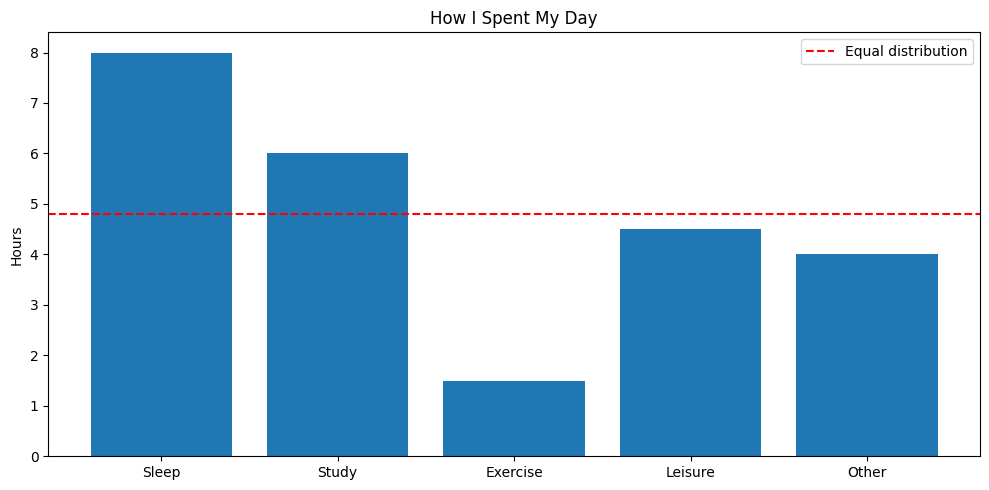

In [5]:
# 📊 Let's visualize your day!
if my_day is not None:
    activities = ['Sleep', 'Study', 'Exercise', 'Leisure', 'Other']
    activities = activities[:len(my_day)]  # Adjust to your vector length
    
    plt.figure(figsize=(10, 5))
    plt.bar(activities, my_day.numpy())
    plt.ylabel('Hours')
    plt.title('How I Spent My Day')
    plt.axhline(y=24/len(my_day), color='r', linestyle='--', label='Equal distribution')
    plt.legend()
    plt.tight_layout()
    plt.show()

### 🟡 Reflection 2: Vector Use Cases

In deep learning, you'll work with vectors constantly. List 3 examples of what vectors might represent:

*Your answers:*
1. Word embeddings (e.g., "cat" → [0.2, 0.5, ..., 0.3])
2. Feature vectors (e.g., person's attributes)
3. Time series (e.g., stock prices over days)


### 1.3 Matrices - Tables of Data

Matrices are 2D tensors that store tabular data:
- Images (grayscale): height × width
- Weight matrices in neural networks
- Batch of feature vectors

In [6]:
# 🔵 TASK 3: Create a "student grade" matrix
# Rows = students, Columns = assignments
# Create a 4×5 matrix (4 students, 5 assignments) with random grades (0-100)

# Hint: Use torch.randint(low, high, size)
# We cast to .float() because .mean() requires floating point numbers
grades = torch.randint(0, 101, (4, 5)).float()

print("Grade Matrix:")
print(grades)
print(f"\nShape: {grades.shape}")

# 🔵 TASK 3b: Calculate each student's average grade
# Collapse columns (dim=1) to get one average per student
student_averages = grades.mean(dim=1) 

# 🔵 TASK 3c: Calculate each assignment's average grade
# Collapse rows (dim=0) to get one average per assignment
assignment_averages = grades.mean(dim=0)

print(f"\nStudent averages: {student_averages}")
print(f"Assignment averages: {assignment_averages}")

Grade Matrix:
tensor([[38., 32., 94., 55.,  2.],
        [21., 10., 12., 47., 30.],
        [ 0., 38., 38., 58., 86.],
        [ 4., 43., 66., 86., 46.]])

Shape: torch.Size([4, 5])

Student averages: tensor([44.2000, 24.0000, 44.0000, 49.0000])
Assignment averages: tensor([15.7500, 30.7500, 52.5000, 61.5000, 41.0000])


### 🧪 Experiment: Understanding Dimensions

When you use `.mean(dim=0)` vs `.mean(dim=1)`, what happens?

Run the code below and observe:

In [8]:
# Let's create a simple 3×4 matrix
matrix = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
]).float()

print("Original matrix:")
print(matrix)
print(f"Shape: {matrix.shape}\n")

print("Mean along dim=0 (collapse rows):")
print(matrix.mean(dim=0))
print(f"Shape: {matrix.mean(dim=0).shape}\n")

print("Mean along dim=1 (collapse columns):")
print(matrix.mean(dim=1))
print(f"Shape: {matrix.mean(dim=1).shape}")

# 🟡 REFLECTION: In your own words, explain what dim=0 vs dim=1 does

Original matrix:
tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])
Shape: torch.Size([3, 4])

Mean along dim=0 (collapse rows):
tensor([5., 6., 7., 8.])
Shape: torch.Size([4])

Mean along dim=1 (collapse columns):
tensor([ 2.5000,  6.5000, 10.5000])
Shape: torch.Size([3])


### 🟡 Reflection 3: Your Explanation

Explain in your own words:
- What does `dim=0` do?
- What does `dim=1` do?
- Why does the output shape change?

*Your explanation:*

dim=0 collapses the rows, while dim=1 collapses the columns.
the output shape changes because we are collapsing the rows and columns.




### 1.4 Higher-Dimensional Tensors - The Real World

In deep learning, you'll often work with 4D tensors, especially for images:

**Shape**: `(Batch, Channels, Height, Width)`

For example, 32 RGB images of size 224×224:
- Batch: 32 (number of images)
- Channels: 3 (Red, Green, Blue)
- Height: 224 pixels
- Width: 224 pixels

In [9]:
# 🔵 TASK 4: Create a batch of grayscale images
# Create a 4D tensor of zeros with shape (8, 1, 28, 28)
# This represents 8 grayscale MNIST-like images

image_batch = torch.zeros(8, 1, 28, 28)  # Your code here (use torch.zeros)

print(f"Batch shape: {image_batch.shape}")
print(f"Number of images: {image_batch.shape[0]}")
print(f"Channels per image: {image_batch.shape[1]}")
print(f"Image dimensions: {image_batch.shape[2]} × {image_batch.shape[3]}")

# 🔵 TASK 4b: What's the total number of pixels in this batch?
total_pixels = 8*1*28*28  # Calculate this
print(f"\nTotal pixels in batch: {total_pixels}")

Batch shape: torch.Size([8, 1, 28, 28])
Number of images: 8
Channels per image: 1
Image dimensions: 28 × 28

Total pixels in batch: 6272


## 🧮 Tensor Operations: The Building Blocks

Now let's explore the operations that power neural networks!

In [10]:
# Basic operations demonstration
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

print("Vector a:", a)
print("Vector b:", b)
print("\nOperations:")
print(f"Addition (a + b): {a + b}")
print(f"Element-wise multiplication (a * b): {a * b}")
print(f"Dot product (a @ b): {a @ b}")
print(f"Sum of a: {a.sum()}")
print(f"Mean of a: {a.mean()}")
print(f"Max of a: {a.max()}")

Vector a: tensor([1., 2., 3.])
Vector b: tensor([4., 5., 6.])

Operations:
Addition (a + b): tensor([5., 7., 9.])
Element-wise multiplication (a * b): tensor([ 4., 10., 18.])
Dot product (a @ b): 32.0
Sum of a: 6.0
Mean of a: 2.0
Max of a: 3.0


### 🔴 Challenge 1: Matrix Multiplication Mystery

Matrix multiplication is at the heart of neural networks. Let's discover why!

**Your Mission**: 
1. Create a 3×4 matrix `W` (think of it as network weights)
2. Create a 4×1 matrix `x` (think of it as input features)
3. Multiply them: `output = W @ x`
4. What's the shape of the output? Why?

In [11]:
# 🔴 CHALLENGE 1: Matrix multiplication

W = torch.randn(3, 4)  # Random weights
x = torch.randn(4, 1)  # Random input

print("Weight matrix W shape:", W.shape)
print("Input vector x shape:", x.shape)

# Perform matrix multiplication
output = W @ x  # Your code: W @ x

print(f"\nOutput shape: {output.shape}")

# 🟡 REFLECTION: Why is the output shape what it is?
# What does each dimension represent in a neural network context?

Weight matrix W shape: torch.Size([3, 4])
Input vector x shape: torch.Size([4, 1])

Output shape: torch.Size([3, 1])


### 🟡 Reflection 4: Matrix Multiplication in Neural Networks

Based on the experiment above:
1. If `W` has shape (3, 4) and `x` has shape (4, 1), why is the output shape (3, 1)?
2. What would this represent in a neural network? (Hint: think about layers)

*Your explanation:*
1. Here we are cancelling out the dimension 4, and hence the shape (3,1).
2. input x is the size 4, wights are the learnable parameters which has 3 neurons and each one of it connects to all the 4 inputs, and in the output layer the data is transformed into 3 dimensional space.


### 🔧 Reshaping: Changing Perspectives

Neural networks often need to reshape data. Let's master this critical skill!

In [12]:
# Create a simple image: 1×28×28 (1 channel, 28×28 pixels)
image = torch.randn(1, 28, 28)
print(f"Original image shape: {image.shape}")
print(f"Total elements: {image.numel()}")

# Flatten to a vector (needed for fully connected layers)
flattened = image.view(-1)  # -1 means "infer this dimension"
print(f"\nFlattened shape: {flattened.shape}")

# Alternative flattening
flattened2 = image.reshape(1, -1)  # Keep batch dimension
print(f"Flattened (keep batch) shape: {flattened2.shape}")

# Reconstruct
reconstructed = flattened.view(1, 28, 28)
print(f"\nReconstructed shape: {reconstructed.shape}")
print(f"Same as original? {torch.equal(image, reconstructed)}")

Original image shape: torch.Size([1, 28, 28])
Total elements: 784

Flattened shape: torch.Size([784])
Flattened (keep batch) shape: torch.Size([1, 784])

Reconstructed shape: torch.Size([1, 28, 28])
Same as original? True


In [13]:
# 🔵 TASK 5: Reshape a batch of images
# You have a batch of 32 RGB images, each 64×64 pixels
# Shape: (32, 3, 64, 64)

batch = torch.randn(32, 3, 64, 64)
print(f"Original batch shape: {batch.shape}")

# Flatten each image while keeping the batch dimension
# Target shape: (32, 3*64*64) = (32, 12288)
flattened_batch = batch.view(32, -1) # Your code here

print(f"Flattened batch shape: {flattened_batch.shape}")

# 🔵 Verify: Does the number of elements match?
print(f"\nOriginal elements: {batch.numel()}")
print(f"Flattened elements: {flattened_batch.numel()}")
print(f"Match? {batch.numel() == flattened_batch.numel()}")

Original batch shape: torch.Size([32, 3, 64, 64])
Flattened batch shape: torch.Size([32, 12288])

Original elements: 393216
Flattened elements: 393216
Match? True


---

# Part 2: Autograd - The Magic of Automatic Differentiation ✨

## Why Autograd is Revolutionary

Imagine you had to calculate derivatives by hand for a network with millions of parameters. Impossible, right?

**Autograd** automatically tracks operations and computes gradients. This is what makes modern deep learning possible!

Let's discover how it works through experiments.

### 🧪 Experiment 1: Simple Gradient

Let's start with a simple function: $f(x) = x^2$

We know the derivative is: $\frac{df}{dx} = 2x$

Let's see PyTorch compute it automatically!

In [14]:
# Create a tensor and tell PyTorch to track operations on it
x = torch.tensor(3.0, requires_grad=True)
print(f"x = {x}")
print(f"Tracking gradients? {x.requires_grad}")

# Define function: f(x) = x^2
y = x ** 2
print(f"\ny = x^2 = {y}")

# Compute gradient
y.backward()  # This computes dy/dx

print(f"\nGradient dy/dx = {x.grad}")
print(f"Expected (2*x) = {2 * x.item()}")
print(f"Match? {abs(x.grad.item() - 2*x.item()) < 1e-6}")

x = 3.0
Tracking gradients? True

y = x^2 = 9.0

Gradient dy/dx = 6.0
Expected (2*x) = 6.0
Match? True


### 🧪 Experiment 2: More Complex Function

Now let's try: $f(x) = 3x^2 + 2x + 1$

Derivative: $\frac{df}{dx} = 6x + 2$

In [15]:
# 🔵 TASK 6: Compute gradient of f(x) = 3x^2 + 2x + 1

x = torch.tensor(2.0, requires_grad=True)

# Define the function
y = 3*x**2 + 2*x + 1 # Your code: 3*x**2 + 2*x + 1

# Compute gradient
y.backward()

print(f"x = {x.item()}")
print(f"y = {y.item()}")
print(f"\nGradient dy/dx = {x.grad.item()}")
print(f"Expected (6*x + 2) = {6*x.item() + 2}")

x = 2.0
y = 17.0

Gradient dy/dx = 14.0
Expected (6*x + 2) = 14.0


### 🎯 Discovering Gradient Descent

Now comes the magic: **using gradients to optimize**!

Imagine you want to find the minimum of $f(x) = (x - 3)^2$

We know the minimum is at $x = 3$, but let's let gradient descent discover it!

In [22]:
# 🔵 TASK 7: Implement gradient descent to find the minimum

# Start far from the minimum
from numpy import gradient


x = torch.tensor(10.0, requires_grad=True)
learning_rate = 0.1
num_steps = 50

# Track the journey
x_history = []
y_history = []

for step in range(num_steps):
    # Compute function value
    y = (x - 3) ** 2
    
    # Store for visualization
    x_history.append(x.item())
    y_history.append(y.item())
    
    # Compute gradient
    y.backward()
    gradient = x.grad
    
    # Update x using gradient descent: x = x - learning_rate * gradient
    with torch.no_grad():  # Don't track this operation
        x -= learning_rate * gradient
        
    
    # Clear gradient for next iteration
    x.grad.zero_()
    
    if step % 10 == 0:
        print(f"Step {step}: x = {x.item():.4f}, y = {y.item():.4f}")

print(f"\nFinal x = {x.item():.4f} (target: 3.0)")

Step 0: x = 8.6000, y = 49.0000
Step 10: x = 3.6013, y = 0.5649
Step 20: x = 3.0646, y = 0.0065
Step 30: x = 3.0069, y = 0.0001
Step 40: x = 3.0007, y = 0.0000

Final x = 3.0001 (target: 3.0)


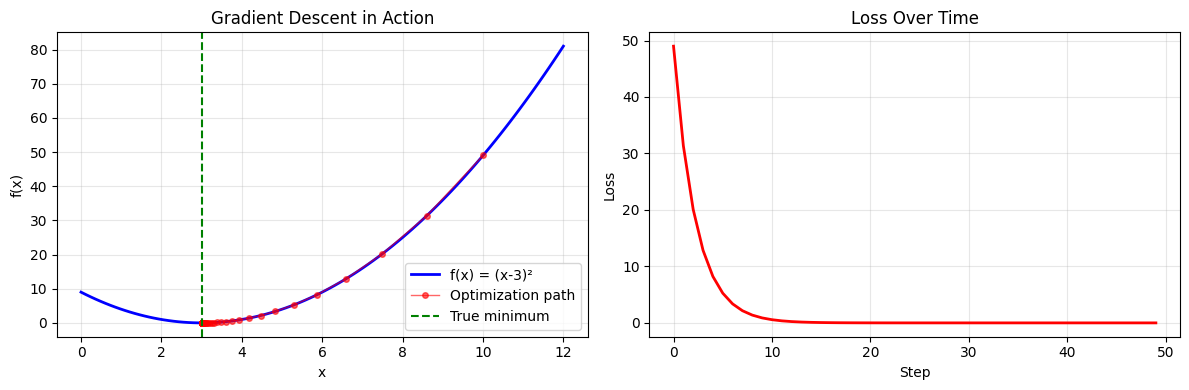

In [23]:
# 📊 Visualize the optimization journey
if len(x_history) > 0:
    plt.figure(figsize=(12, 4))
    
    # Plot 1: Function and optimization path
    plt.subplot(1, 2, 1)
    x_range = np.linspace(0, 12, 100)
    y_range = (x_range - 3) ** 2
    plt.plot(x_range, y_range, 'b-', linewidth=2, label='f(x) = (x-3)²')
    plt.plot(x_history, y_history, 'ro-', markersize=4, linewidth=1, alpha=0.6, label='Optimization path')
    plt.axvline(x=3, color='g', linestyle='--', label='True minimum')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Gradient Descent in Action')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Convergence
    plt.subplot(1, 2, 2)
    plt.plot(y_history, 'r-', linewidth=2)
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title('Loss Over Time')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [25]:
# 🔵 TASK 7: Implement gradient descent to find the minimum

# Start far from the minimum
from numpy import gradient


x = torch.tensor(10.0, requires_grad=True)
learning_rate = 1.0
num_steps = 50

# Track the journey
x_history = []
y_history = []

for step in range(num_steps):
    # Compute function value
    y = (x - 3) ** 2
    
    # Store for visualization
    x_history.append(x.item())
    y_history.append(y.item())
    
    # Compute gradient
    y.backward()
    gradient = x.grad
    
    # Update x using gradient descent: x = x - learning_rate * gradient
    with torch.no_grad():  # Don't track this operation
        x -= learning_rate * gradient
        
    
    # Clear gradient for next iteration
    x.grad.zero_()
    
    if step % 10 == 0:
        print(f"Step {step}: x = {x.item():.4f}, y = {y.item():.4f}")

print(f"\nFinal x = {x.item():.4f} (target: 3.0)")

Step 0: x = -4.0000, y = 49.0000
Step 10: x = -4.0000, y = 49.0000
Step 20: x = -4.0000, y = 49.0000
Step 30: x = -4.0000, y = 49.0000
Step 40: x = -4.0000, y = 49.0000

Final x = 10.0000 (target: 3.0)


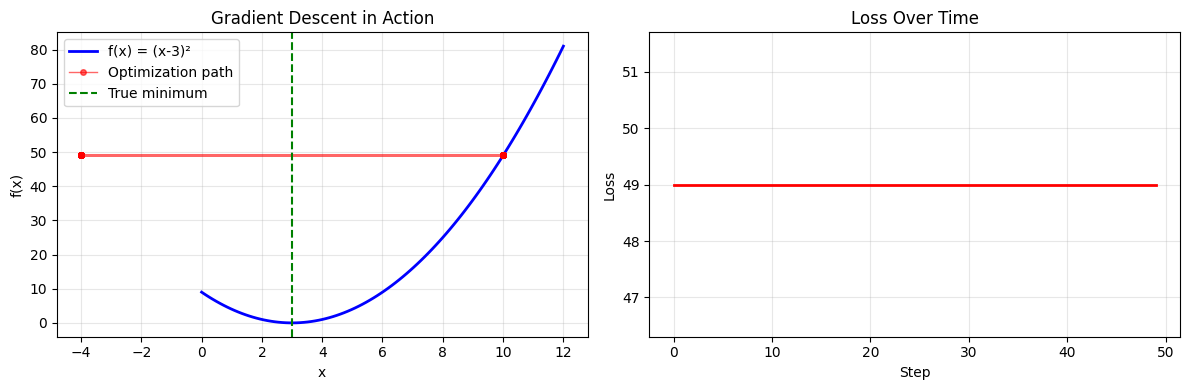

In [26]:
# 📊 Visualize the optimization journey
if len(x_history) > 0:
    plt.figure(figsize=(12, 4))
    
    # Plot 1: Function and optimization path
    plt.subplot(1, 2, 1)
    x_range = np.linspace(0, 12, 100)
    y_range = (x_range - 3) ** 2
    plt.plot(x_range, y_range, 'b-', linewidth=2, label='f(x) = (x-3)²')
    plt.plot(x_history, y_history, 'ro-', markersize=4, linewidth=1, alpha=0.6, label='Optimization path')
    plt.axvline(x=3, color='g', linestyle='--', label='True minimum')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Gradient Descent in Action')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Convergence
    plt.subplot(1, 2, 2)
    plt.plot(y_history, 'r-', linewidth=2)
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title('Loss Over Time')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### 🟡 Reflection 5: Understanding Gradient Descent

Based on the visualization above:
1. How did x change over time? Was it gradual or sudden?
2. What role does the learning rate play?
3. What happens if you set learning_rate = 1.0? Try it!
4. How is this related to training neural networks?

*Your insights:*
1. X changed rapidly in the begining and then slowed down as it approached the minimum.
2. it acts as a step size. 
3. the steps are too big and hence there will be huge oscillations.
4. Training a network is the same process. the only difference being the number of weights and inputs.



---

# Part 3: Building Your First Neural Network 🧠

## The MNIST Challenge

You're about to build a neural network that can recognize handwritten digits (0-9).

This is the "Hello World" of deep learning, but it's a real accomplishment!

### The Dataset: MNIST

- **Training samples**: 60,000 handwritten digits
- **Test samples**: 10,000 handwritten digits  
- **Image size**: 28×28 pixels (grayscale)
- **Classes**: 10 (digits 0-9)

In [24]:
# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize (mean, std of MNIST)
])

# Download and load training data
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# Download and load test data
test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

print(f"✅ Training samples: {len(train_dataset)}")
print(f"✅ Test samples: {len(test_dataset)}")

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:02<00:00, 3508351.10it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 632271.82it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:00<00:00, 2569430.28it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 2926798.09it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

✅ Training samples: 60000
✅ Test samples: 10000


### 🔍 Exploring the Data

Before building a model, let's understand what we're working with!

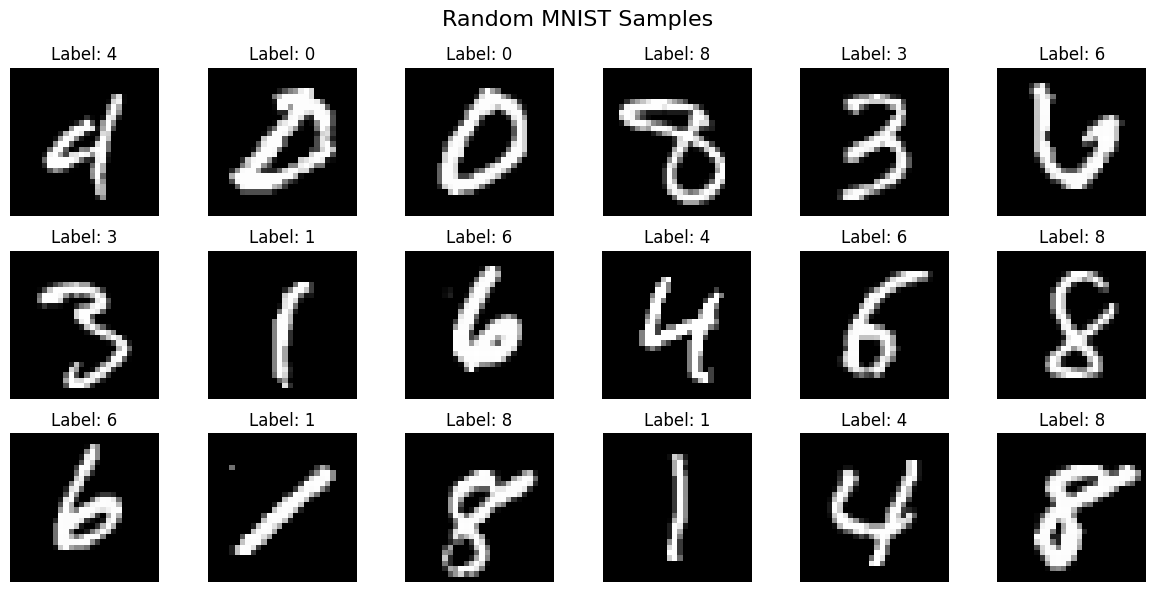


Image shape: torch.Size([1, 28, 28])
Label: 5
Pixel value range: [-0.42, 2.82]


In [27]:
# 📊 Visualize random samples from the dataset

fig, axes = plt.subplots(3, 6, figsize=(12, 6))
axes = axes.flatten()

for i in range(18):
    # Get a random sample
    idx = np.random.randint(len(train_dataset))
    image, label = train_dataset[idx]
    
    # Convert from tensor to numpy for plotting
    image = image.squeeze().numpy()
    
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')

plt.suptitle('Random MNIST Samples', fontsize=16)
plt.tight_layout()
plt.show()

# Get a single image to inspect
sample_image, sample_label = train_dataset[0]
print(f"\nImage shape: {sample_image.shape}")
print(f"Label: {sample_label}")
print(f"Pixel value range: [{sample_image.min():.2f}, {sample_image.max():.2f}]")

### 🔵 Task 8: Dataset Analysis

Let's analyze the dataset distribution

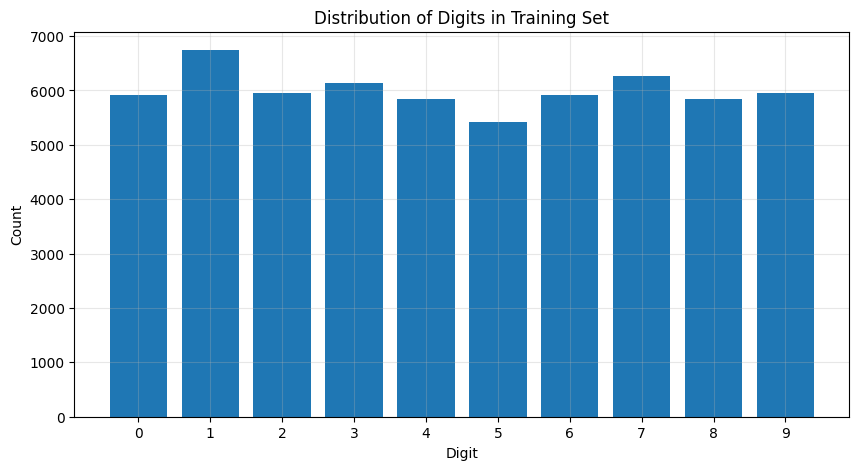

Count per digit:
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


In [28]:
# Count how many examples of each digit we have
digit_counts = torch.zeros(10)

for _, label in train_dataset:
    digit_counts[label] += 1

# 📊 Visualize the distribution
plt.figure(figsize=(10, 5))
plt.bar(range(10), digit_counts.numpy())
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Distribution of Digits in Training Set')
plt.xticks(range(10))
plt.grid(True, alpha=0.3)
plt.show()

print("Count per digit:")
for digit in range(10):
    print(f"Digit {digit}: {int(digit_counts[digit])} samples")

### 🟡 Reflection 6: Dataset Properties

1. Is the dataset balanced? (Do all digits appear roughly equally?)
2. Why does this matter for training?
3. What problems might arise with an imbalanced dataset?

*Your thoughts:*

1. **Balance**: Yes, it is **roughly balanced**. While not perfectly equal (Digit 1 has ~6700 samples vs Digit 5 has ~5400), no single digit dominates or is missing.

2. **Importance**: It ensures the model treats all classes **fairly**. If 90% of data were "1"s, the model would just guess "1" every time and get 90% accuracy without learning anything!

3. **Problems with Imbalance**: 
   - **Bias**: The model becomes biased towards the majority class.
   - **Misleading Accuracy**: High accuracy but fails on the minority class (e.g., detecting rare diseases).

### 📦 Creating Data Loaders

Data loaders handle:
- **Batching**: Processing multiple samples at once
- **Shuffling**: Randomizing order (prevents overfitting)
- **Parallel loading**: Faster data loading

In [29]:
# 🔵 TASK 9: Create data loaders

batch_size = 64  # Number of samples per batch

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,  # Shuffle training data
    num_workers=2  # Parallel data loading
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,  # Don't shuffle test data
    num_workers=2
)

print(f"✅ Training batches: {len(train_loader)}")
print(f"✅ Test batches: {len(test_loader)}")

# Let's see what a batch looks like
images, labels = next(iter(train_loader))
print(f"\nBatch of images shape: {images.shape}")
print(f"Batch of labels shape: {labels.shape}")
print(f"First 10 labels in batch: {labels[:10]}")

✅ Training batches: 938
✅ Test batches: 157

Batch of images shape: torch.Size([64, 1, 28, 28])
Batch of labels shape: torch.Size([64])
First 10 labels in batch: tensor([5, 9, 7, 4, 0, 4, 0, 8, 2, 8])


### 🟡 Reflection 7: Understanding Batches

1. Why do we use batches instead of processing one image at a time?
2. What's the tradeoff between large and small batch sizes?
3. Why shuffle training data but not test data?

*Your reasoning:*

1. **Efficiency & Stability**: Processing one image at a time is too slow and the gradients would be very "noisy" (erratic). Batches allow us to use **parallel computing** (GPU power) and get a more stable estimate of the gradient.

2. **Tradeoff**:
   - **Large Batches**: Faster training (better GPU usage), but requires more memory and can sometimes get stuck in "sharp" local minima (worse generalization).
   - **Small Batches**: Slower, but the "noise" can actually help the model escape bad local minima and generalize better.

3. **Shuffling**:
   - **Train**: We shuffle to break any inherent order in the data (e.g., if all "0"s were first, the model would only learn "0"s for the first hour). It ensures every batch is a representative sample.
   - **Test**: No need to shuffle! We just want to evaluate the model on all examples. Keeping the order is often helpful for debugging.

## 🏗️ Building Your Neural Network

Now for the exciting part: **designing your model**!

### Architecture Overview

```
Input (28×28 image) 
    ↓
Flatten to vector (784 values)
    ↓
Hidden Layer 1 (128 neurons) + ReLU
    ↓
Hidden Layer 2 (64 neurons) + ReLU
    ↓
Output Layer (10 neurons, one per digit)
```

In [30]:
# 🟢 TASK 10: Complete the neural network architecture

class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        
        # Input: 28×28 = 784 pixels
        # Output: 10 classes (digits 0-9)
        
        # YOUR CODE: Define three fully connected layers
        # Layer 1: 784 → 128
        self.fc1 = nn.Linear(784, 128)
        
        # Layer 2: 128 → 64
        self.fc2 = nn.Linear(128, 64)
        
        # Layer 3: 64 → 10
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        # x shape: (batch_size, 1, 28, 28)
        
        # YOUR CODE: Flatten the image
        # Hint: x.view(x.size(0), -1) keeps batch dimension
        x = x.view(x.size(0), -1)
        
        # YOUR CODE: Pass through layers with ReLU activations
        # Layer 1
        x = F.relu(self.fc1(x))
        
        # Layer 2
        x = F.relu(self.fc2(x))
        
        # Layer 3 (no activation - we'll use CrossEntropyLoss)
        x = self.fc3(x)
        
        return x

# Create the model
model = MNISTClassifier()
print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\n📊 Total parameters: {total_params:,}")
print(f"📊 Trainable parameters: {trainable_params:,}")

MNISTClassifier(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

📊 Total parameters: 109,386
📊 Trainable parameters: 109,386


### 🧪 Test Your Model Architecture

In [31]:
# Test if the model works with a dummy batch
dummy_input = torch.randn(5, 1, 28, 28)  # Batch of 5 images
print(f"Input shape: {dummy_input.shape}")

try:
    output = model(dummy_input)
    print(f"Output shape: {output.shape}")
    print(f"✅ Model architecture is correct!")
    
    # Show what the untrained network outputs
    print(f"\nRaw outputs (before training):")
    print(output[0])  # First sample
    
    # Apply softmax to see probabilities
    probabilities = F.softmax(output[0], dim=0)
    print(f"\nProbabilities for each digit (before training):")
    for digit in range(10):
        print(f"Digit {digit}: {probabilities[digit]:.2%}")
        
except Exception as e:
    print(f"❌ Error: {e}")
    print("Check your forward() method!")

Input shape: torch.Size([5, 1, 28, 28])
Output shape: torch.Size([5, 10])
✅ Model architecture is correct!

Raw outputs (before training):
tensor([ 0.0755,  0.2844, -0.0940,  0.1527, -0.1873, -0.0145,  0.2382, -0.0992,
         0.1192, -0.0694], grad_fn=<SelectBackward0>)

Probabilities for each digit (before training):
Digit 0: 10.24%
Digit 1: 12.62%
Digit 2: 8.64%
Digit 3: 11.06%
Digit 4: 7.87%
Digit 5: 9.36%
Digit 6: 12.05%
Digit 7: 8.60%
Digit 8: 10.70%
Digit 9: 8.86%


### 🟡 Reflection 8: Untrained Network Behavior

Look at the probabilities above. Before training:
1. How confident is the model about each digit?
2. Why are the probabilities roughly equal?
3. What will training do to these probabilities?

*Your observations:*

1. **Confidence**: It has **very low confidence** (about 10% for each digit). It is essentially guessing randomly.

2. **Why Equal?**: The weights are initialized with **random small numbers**. Since the network hasn't learned any patterns yet, it treats every digit as equally likely. With 10 classes, random chance is 1/10 = 10%.

3. **Training Effect**: Training will push the probability of the **correct** digit closer to **100%** (1.0) and push the others closer to **0%**. Ideally, we want to see something like [0.01, 0.98, 0.0, ...] for a digit "1".

## ⚙️ Setting Up Training

Before we can train, we need:
1. **Loss function**: Measures how wrong our predictions are
2. **Optimizer**: Updates weights to reduce loss

In [33]:
# 🔵 TASK 11: Set up loss function and optimizer

# Loss function for classification
criterion = nn.CrossEntropyLoss()

# Optimizer - try different ones!
# Option 1: SGD with momentum
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Option 2: Adam (often works better)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print("✅ Loss function: CrossEntropyLoss")
print(f"✅ Optimizer: {optimizer.__class__.__name__}")
print(f"✅ Learning rate: {optimizer.param_groups[0]['lr']}")

✅ Loss function: CrossEntropyLoss
✅ Optimizer: Adam
✅ Learning rate: 0.001


## 🏃 Training Loop: Where the Magic Happens

The training loop follows this pattern:

```
For each epoch:
    For each batch:
        1. Forward pass (make predictions)
        2. Calculate loss (how wrong are we?)
        3. Backward pass (compute gradients)
        4. Update weights (take a step)
        5. Zero gradients (prepare for next batch)
```

Let's implement this together!

In [34]:
# 🟢 TASK 12: Complete the training loop with your understanding

def train_one_epoch(model, train_loader, criterion, optimizer, device='cpu'):
    """
    Train the model for one epoch
    
    Returns:
        average_loss: Average loss over all batches
        accuracy: Training accuracy
    """
    model.train()  # Set model to training mode
    
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (images, labels) in enumerate(train_loader):
        # Move data to device (CPU or GPU)
        images, labels = images.to(device), labels.to(device)
        
        # YOUR CODE: Step 1 - Forward pass
        outputs = model(images)
        
        # YOUR CODE: Step 2 - Calculate loss
        loss = criterion(outputs, labels)
        
        # YOUR CODE: Step 3 - Zero the gradients
        optimizer.zero_grad()
        
        # YOUR CODE: Step 4 - Backward pass
        loss.backward()
        
        # YOUR CODE: Step 5 - Update weights
        optimizer.step()
        
        # Track statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Print progress every 100 batches
        if (batch_idx + 1) % 100 == 0:
            print(f'  Batch [{batch_idx + 1}/{len(train_loader)}], '
                  f'Loss: {loss.item():.4f}')
    
    avg_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    
    return avg_loss, accuracy

print("✅ Training function defined!")

✅ Training function defined!


### 📊 Evaluation Function

In [35]:
def evaluate(model, test_loader, criterion, device='cpu'):
    """
    Evaluate the model on test data
    
    Returns:
        average_loss: Average loss over test set
        accuracy: Test accuracy
    """
    model.eval()  # Set model to evaluation mode
    
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():  # Don't track gradients during evaluation
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Track statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = running_loss / len(test_loader)
    accuracy = 100 * correct / total
    
    return avg_loss, accuracy

print("✅ Evaluation function defined!")

✅ Evaluation function defined!


## 🚀 Let's Train!

Time to see your neural network learn!

In [36]:
# Training configuration
num_epochs = 5
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

print(f"Training on: {device}")
print(f"Number of epochs: {num_epochs}")
print("\nStarting training...\n")

# Track history
train_losses = []
train_accs = []
test_losses = []
test_accs = []

for epoch in range(num_epochs):
    print(f"{'='*60}")
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"{'='*60}")
    
    # Train
    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
    
    # Evaluate
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)
    
    # Store history
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    
    # Print summary
    print(f"\nEpoch Summary:")
    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"  Test Loss:  {test_loss:.4f} | Test Acc:  {test_acc:.2f}%")
    print()

print("\n" + "="*60)
print("🎉 Training Complete!")
print("="*60)
print(f"Final Test Accuracy: {test_accs[-1]:.2f}%")

Training on: cpu
Number of epochs: 5

Starting training...

Epoch 1/5
  Batch [100/938], Loss: 0.2172
  Batch [200/938], Loss: 0.2159
  Batch [300/938], Loss: 0.1744
  Batch [400/938], Loss: 0.1860
  Batch [500/938], Loss: 0.2088
  Batch [600/938], Loss: 0.1294
  Batch [700/938], Loss: 0.2024
  Batch [800/938], Loss: 0.1149
  Batch [900/938], Loss: 0.0304

Epoch Summary:
  Train Loss: 0.2649 | Train Acc: 92.09%
  Test Loss:  0.1377 | Test Acc:  95.63%

Epoch 2/5
  Batch [100/938], Loss: 0.0602
  Batch [200/938], Loss: 0.0666
  Batch [300/938], Loss: 0.1145
  Batch [400/938], Loss: 0.1584
  Batch [500/938], Loss: 0.0332
  Batch [600/938], Loss: 0.0793
  Batch [700/938], Loss: 0.1934
  Batch [800/938], Loss: 0.1021
  Batch [900/938], Loss: 0.1443

Epoch Summary:
  Train Loss: 0.1088 | Train Acc: 96.68%
  Test Loss:  0.1033 | Test Acc:  96.97%

Epoch 3/5
  Batch [100/938], Loss: 0.0660
  Batch [200/938], Loss: 0.0720
  Batch [300/938], Loss: 0.0345
  Batch [400/938], Loss: 0.0424
  Batch 

### 📊 Visualize Training Progress

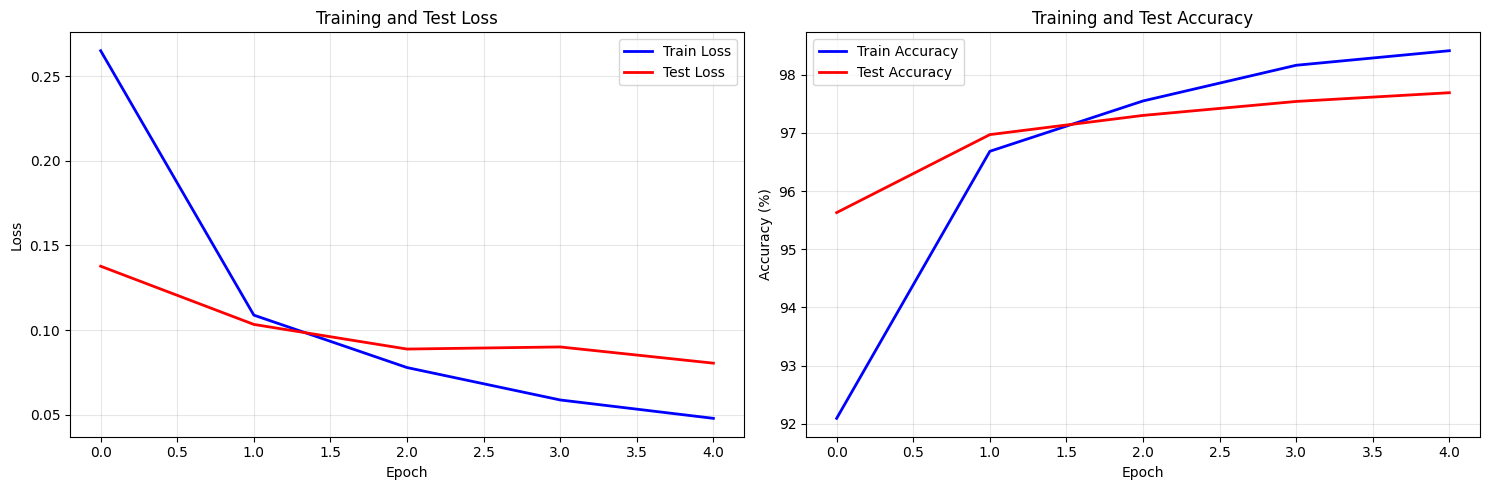

In [37]:
# Plot training curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Loss plot
ax1.plot(train_losses, 'b-', label='Train Loss', linewidth=2)
ax1.plot(test_losses, 'r-', label='Test Loss', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Test Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy plot
ax2.plot(train_accs, 'b-', label='Train Accuracy', linewidth=2)
ax2.plot(test_accs, 'r-', label='Test Accuracy', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Training and Test Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 🟡 Reflection 9: Analyzing Training Curves

Look at the plots above:
1. How did the loss change over epochs? What does this tell you?
2. Is there a gap between train and test accuracy? What does this mean?
3. Did the model overfit or underfit? How can you tell?
4. What could you do to improve performance?

*Your analysis:*

1. **Loss Changes**: Both training and test loss decreased significantly, which means the model is effectively learning from the data. The training loss dropped much faster and lower (from ~0.27 to ~0.05) than the test loss (from ~0.13 to ~0.08).

2. **Accuracy Gap**: Yes, there is a gap. The training accuracy (~98.5%) is higher than the test accuracy (~97.5%). This means the model is slightly better at recognizing images it has already seen compared to new, unseen images.

3. **Overfitting**: The model is starting to **overfit**. We can tell because the training loss continues to dive steeply while the test loss has flattened out and stopped improving. The widening gap between the training and test curves is a classic sign that the model is memorizing the training data rather than just generalizing.

4. **Improvements**: To fix this, we could:
   - Add **Dropout** layers to randomly disable neurons during training.
   - Use **Data Augmentation** (rotate, shift, or zoom images) to create more variety.
   - Use **Early Stopping** to stop training before the test loss starts to get worse.

## 🔮 See Your Model in Action!

Let's visualize what your trained network can do!

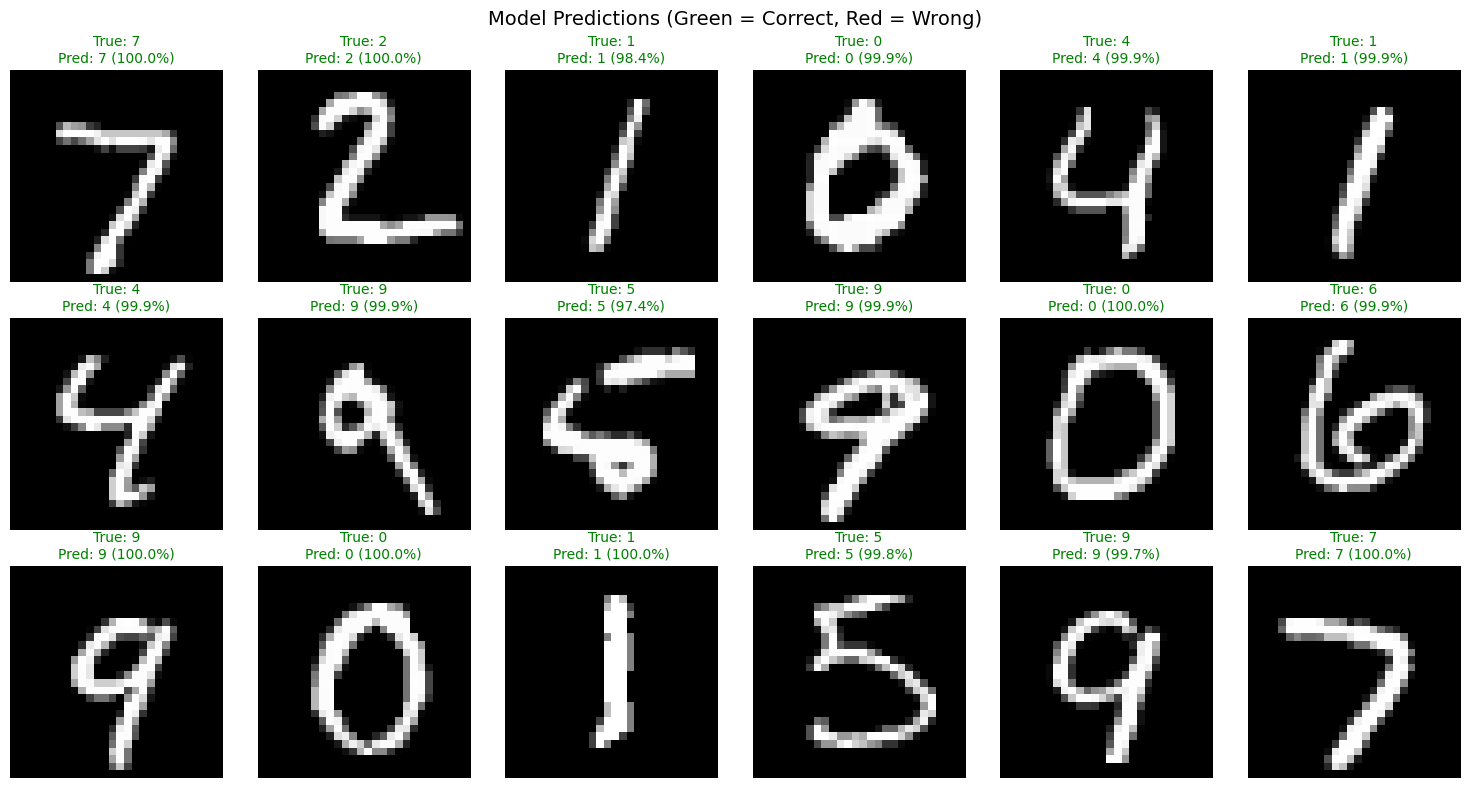

In [38]:
# Get a batch of test images
model.eval()
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

# Get predictions
with torch.no_grad():
    outputs = model(images)
    probabilities = F.softmax(outputs, dim=1)
    _, predicted = torch.max(outputs, 1)

# Move back to CPU for plotting
images = images.cpu()
labels = labels.cpu()
predicted = predicted.cpu()
probabilities = probabilities.cpu()

# Visualize predictions
fig, axes = plt.subplots(3, 6, figsize=(15, 8))
axes = axes.flatten()

for i in range(18):
    img = images[i].squeeze().numpy()
    true_label = labels[i].item()
    pred_label = predicted[i].item()
    confidence = probabilities[i][pred_label].item()
    
    axes[i].imshow(img, cmap='gray')
    
    # Color: green if correct, red if wrong
    color = 'green' if true_label == pred_label else 'red'
    axes[i].set_title(
        f'True: {true_label}\nPred: {pred_label} ({confidence:.1%})',
        color=color,
        fontsize=10
    )
    axes[i].axis('off')

plt.suptitle('Model Predictions (Green = Correct, Red = Wrong)', fontsize=14)
plt.tight_layout()
plt.show()

### 📊 Confusion Matrix: Where Does the Model Struggle?

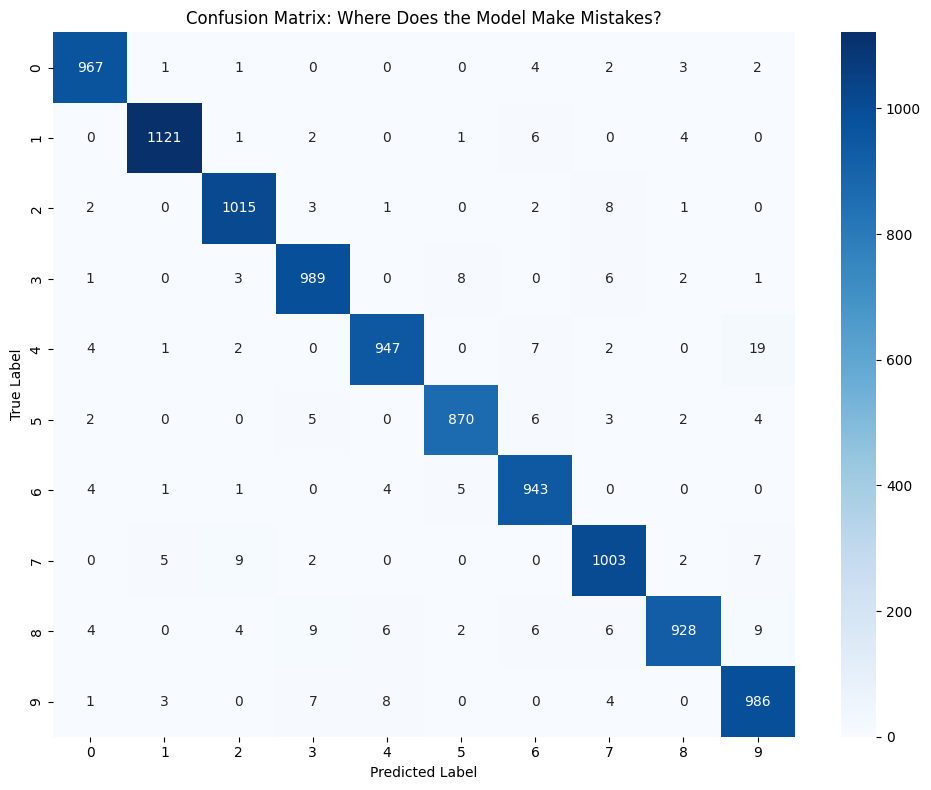


Most Common Confusions:


In [39]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get all predictions
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

# Create confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Where Does the Model Make Mistakes?')
plt.tight_layout()
plt.show()

# Find most confused pairs
print("\nMost Common Confusions:")
for i in range(10):
    for j in range(10):
        if i != j and cm[i, j] > 50:  # Threshold for "common"
            print(f"  {i} misclassified as {j}: {cm[i, j]} times")

### 🟡 Reflection 10: Understanding Errors

Look at the confusion matrix:
1. Which digits does the model confuse most often?
2. Why might these specific digits be confused?
3. How could you improve the model to reduce these errors?

*Your insights:*

1. **Common Confusions**: The model struggles most with:
   - **4 vs 9** (19 errors)
   - **8 vs 3** (9 errors)
   - **8 vs 9** (9 errors)

2. **Why?**: These digits share similar structural features:
  - 4 and 9 have open and close loops make them look alike.
  - 8 and 3 and 9 are curvy digits. 8 with its faint left side looks like a 3 and 8 with a messy bottomo look like 9.

3. **How to Improve**:
   - **Data Augmentation**: Apply small rotations or distortions to help the model learn to handle messy handwriting.
   - **CNNs**: Switch to a Convolutional Neural Network, which is much better at detecting local shapes (loops, edges) than our simple linear model.
   - **Analyze Errors**: Specifically look at the images the model got wrong to understand if they are truly ambiguous (even humans might get them wrong).

---

# 🔴 Advanced Challenges: Push Your Limits!

You've mastered the basics. Now it's time to explore!

## 🔴 Challenge 1: Experiment with Architectures

**Goal**: Design a better model

Try:
- Adding more layers
- Changing layer sizes
- Adding dropout (prevents overfitting)
- Adding batch normalization

**Target**: Beat 97% test accuracy

In [40]:
# 🔴 YOUR CHALLENGE: Design your own architecture

class ImprovedClassifier(nn.Module):
    def __init__(self):
        super(ImprovedClassifier, self).__init__()
        
        # YOUR DESIGN HERE
        # Ideas:
        # - More layers
        # - Dropout: nn.Dropout(0.5)
        # - Batch norm: nn.BatchNorm1d(size)
        # - Different activation functions
        
        # 1. Input Layer (784 -> 512)
        self.fc1 = nn.Linear(784, 512)
        self.bn1 = nn.BatchNorm1d(512)  # Batch Norm for stability
        
        # 2. Hidden Layer (512 -> 256)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        
        # 3. Hidden Layer (256 -> 128)
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        
        # 4. Output Layer (128 -> 10)
        self.fc4 = nn.Linear(128, 10)
        
        # Dropout to prevent overfitting
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        # YOUR FORWARD PASS HERE
        # Flatten input
        x = x.view(-1, 784)
        
        # Layer 1: Linear -> BN -> ReLU -> Dropout
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        # Layer 2: Linear -> BN -> ReLU -> Dropout
        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        # Layer 3: Linear -> BN -> ReLU -> Dropout
        x = self.fc3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        # Output Layer: Linear
        x = self.fc4(x)
        return x

# Train and compare!
print("🚀 Training Improved Model...")
improved_model = ImprovedClassifier().to(device)
optimizer_improved = torch.optim.Adam(improved_model.parameters(), lr=0.001)

# Train loop for improved model
improved_train_losses = []
improved_test_accs = []

for epoch in range(5):  # Train for 5 epochs
    train_loss, train_acc = train_one_epoch(improved_model, train_loader, criterion, optimizer_improved, device)
    test_loss, test_acc = evaluate(improved_model, test_loader, criterion, device)
    
    improved_train_losses.append(train_loss)
    improved_test_accs.append(test_acc)
    
    print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Test Acc={test_acc:.2f}%")

print(f"\n🏆 Final Test Accuracy: {improved_test_accs[-1]:.2f}%")

🚀 Training Improved Model...
  Batch [100/938], Loss: 0.2619
  Batch [200/938], Loss: 0.2831
  Batch [300/938], Loss: 0.1286
  Batch [400/938], Loss: 0.2212
  Batch [500/938], Loss: 0.0817
  Batch [600/938], Loss: 0.3349
  Batch [700/938], Loss: 0.1804
  Batch [800/938], Loss: 0.1315
  Batch [900/938], Loss: 0.2126
Epoch 1: Train Loss=0.2534, Test Acc=96.88%
  Batch [100/938], Loss: 0.1434
  Batch [200/938], Loss: 0.1759
  Batch [300/938], Loss: 0.1550
  Batch [400/938], Loss: 0.0332
  Batch [500/938], Loss: 0.0685
  Batch [600/938], Loss: 0.1071
  Batch [700/938], Loss: 0.2180
  Batch [800/938], Loss: 0.2909
  Batch [900/938], Loss: 0.0265
Epoch 2: Train Loss=0.1242, Test Acc=97.85%
  Batch [100/938], Loss: 0.0672
  Batch [200/938], Loss: 0.0178
  Batch [300/938], Loss: 0.0417
  Batch [400/938], Loss: 0.0300
  Batch [500/938], Loss: 0.2184
  Batch [600/938], Loss: 0.0409
  Batch [700/938], Loss: 0.0584
  Batch [800/938], Loss: 0.0377
  Batch [900/938], Loss: 0.0340
Epoch 3: Train Loss

## 🔴 Challenge 2: Hyperparameter Tuning

**Goal**: Find the best hyperparameters

Experiment with:
- Learning rates: [0.1, 0.01, 0.001, 0.0001]
- Batch sizes: [32, 64, 128, 256]
- Optimizers: SGD, Adam, RMSprop
- Number of epochs

**Document** what you try and what works best!

In [41]:
# 🔴 YOUR CHALLENGE: Systematic hyperparameter search

import pandas as pd

# Create a table to track results
results = []

# Example experiment
for lr in [0.01, 0.001, 0.0001]:
    for batch_size in [32, 64, 128]:
        print(f"\nTrying: lr={lr}, batch_size={batch_size}")
        
        # YOUR CODE: Create model, train, evaluate
        # 1. Prepare Data Loader
        temp_train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        
        # 2. Create Model
        model = MNISTClassifier().to(device)
        
        # 3. Optimizer (Using Adam)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        
        # 4. Train (1 epoch for speed)
        train_one_epoch(model, temp_train_loader, criterion, optimizer, device)
        
        # 5. Evaluate
        _, test_acc = evaluate(model, test_loader, criterion, device)
        
        # Record results
        results.append({
            'Learning Rate': lr,
            'Batch Size': batch_size,
            'Test Accuracy': test_acc
        })

# Visualize results
df_results = pd.DataFrame(results)
display(df_results.sort_values(by='Test Accuracy', ascending=False))


Trying: lr=0.01, batch_size=32
  Batch [100/1875], Loss: 0.5263
  Batch [200/1875], Loss: 0.5829
  Batch [300/1875], Loss: 0.3338
  Batch [400/1875], Loss: 0.5430
  Batch [500/1875], Loss: 0.2267
  Batch [600/1875], Loss: 0.1917
  Batch [700/1875], Loss: 0.5095
  Batch [800/1875], Loss: 0.1146
  Batch [900/1875], Loss: 0.3938
  Batch [1000/1875], Loss: 0.1367
  Batch [1100/1875], Loss: 0.1376
  Batch [1200/1875], Loss: 0.0864
  Batch [1300/1875], Loss: 0.1792
  Batch [1400/1875], Loss: 0.0215
  Batch [1500/1875], Loss: 0.1689
  Batch [1600/1875], Loss: 0.0994
  Batch [1700/1875], Loss: 0.0743
  Batch [1800/1875], Loss: 0.0453

Trying: lr=0.01, batch_size=64
  Batch [100/938], Loss: 0.3073
  Batch [200/938], Loss: 0.2265
  Batch [300/938], Loss: 0.1381
  Batch [400/938], Loss: 0.3345
  Batch [500/938], Loss: 0.4081
  Batch [600/938], Loss: 0.1464
  Batch [700/938], Loss: 0.4172
  Batch [800/938], Loss: 0.3491
  Batch [900/938], Loss: 0.1628

Trying: lr=0.01, batch_size=128
  Batch [100

,Learning Rate,Batch Size,Test Accuracy
4,0.0010,64,96.00
3,0.0010,32,95.94
2,0.0100,128,95.60
5,0.0010,128,95.34
1,0.0100,64,94.42
0,0.0100,32,93.37
6,0.0001,32,92.56
7,0.0001,64,91.32
8,0.0001,128,90.50


## 🔴 Challenge 3: Visualize What the Network Learns

**Goal**: Understand what features the network has learned

Visualize:
1. First layer weights as images
2. Activation patterns for different digits
3. Which neurons activate for which digits

First layer weights shape: torch.Size([128, 784])


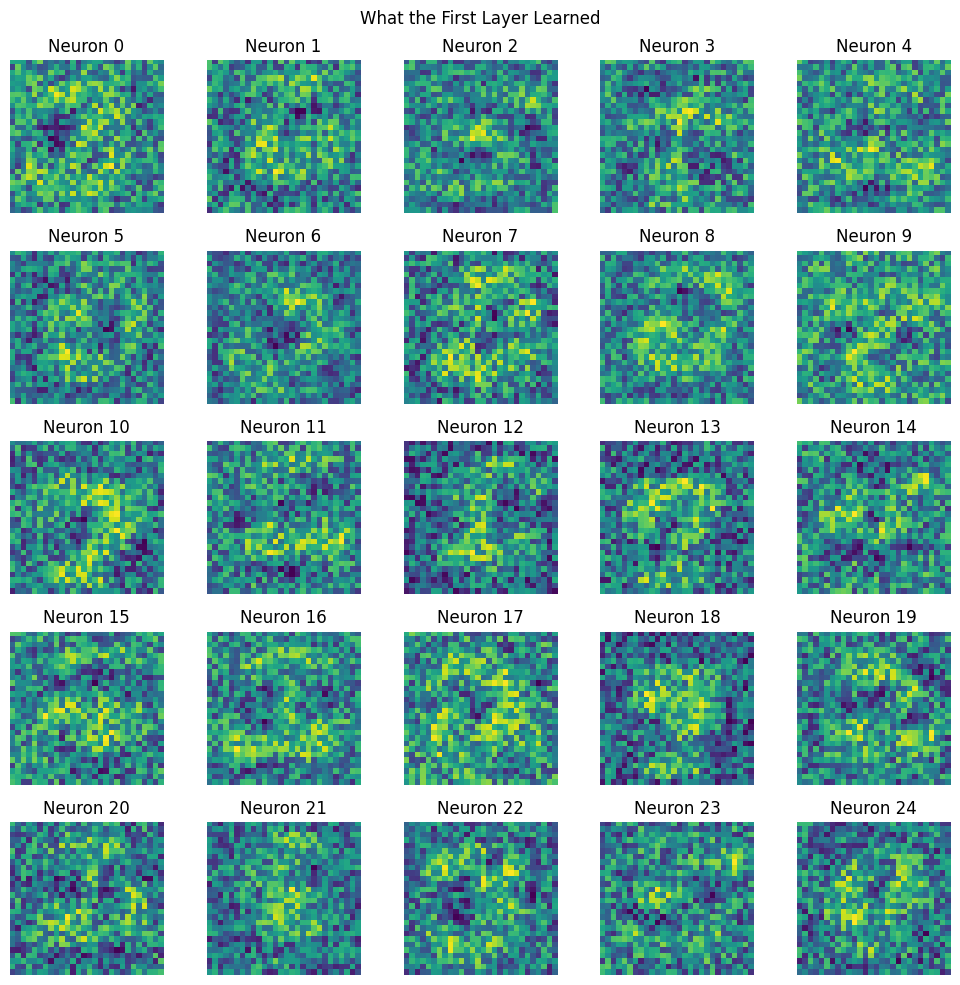


2. Visualizing Activation Patterns for Different Digits...


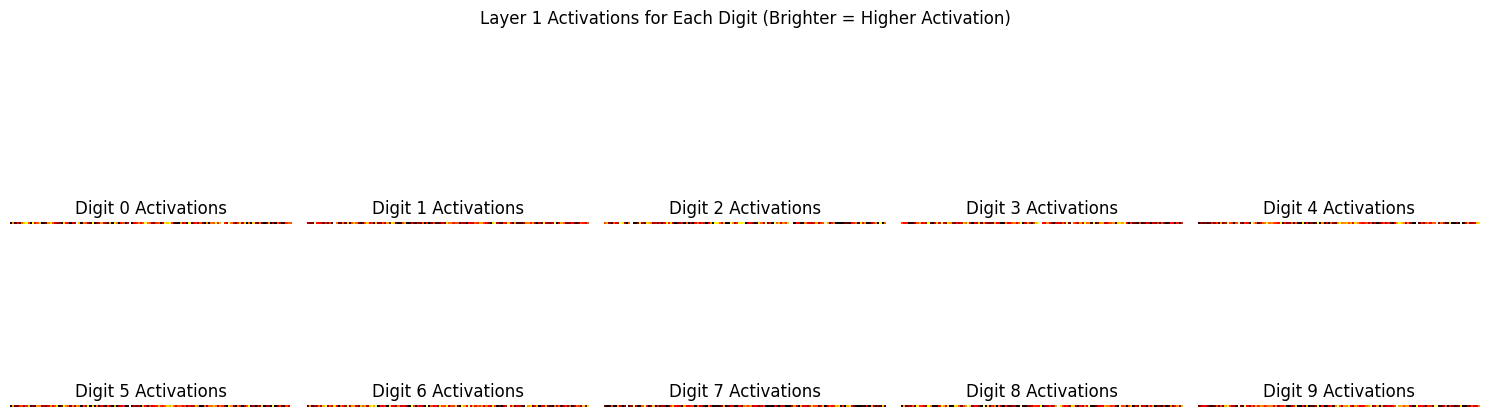


3. Which neurons activate for which digits? (Average Activation)


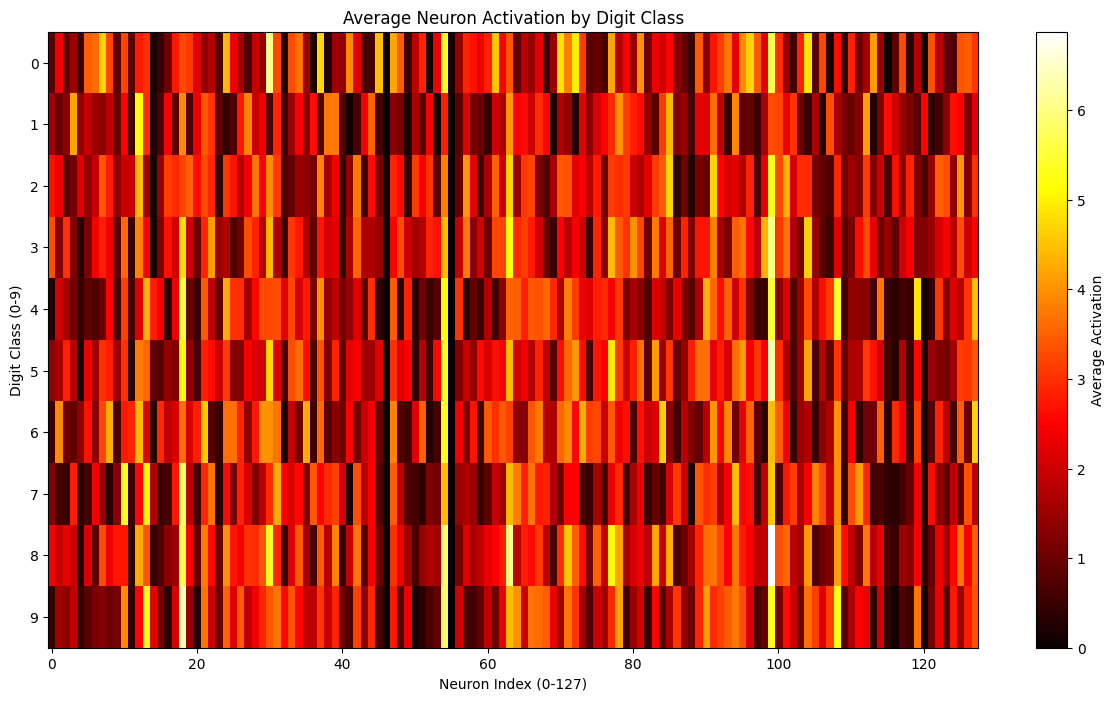


Top neuron for each digit:
Digit 0: Neuron 30
Digit 1: Neuron 12
Digit 2: Neuron 99
Digit 3: Neuron 99
Digit 4: Neuron 18
Digit 5: Neuron 99
Digit 6: Neuron 54
Digit 7: Neuron 18
Digit 8: Neuron 99
Digit 9: Neuron 18


In [42]:
# 🔴 YOUR CHALLENGE: Visualize learned features

# Hint: model.fc1.weight has shape (128, 784)
# Each row is a "filter" - reshape to 28×28 and visualize

weights = model.fc1.weight.data.cpu()
print(f"First layer weights shape: {weights.shape}")

# Visualize first 25 filters
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.flatten()

for i in range(25):
    # YOUR CODE: Reshape weight to 28×28 and plot
    weight_img = weights[i].view(28, 28)
    axes[i].imshow(weight_img, cmap='viridis')
    axes[i].axis('off')
    axes[i].set_title(f'Neuron {i}')

plt.suptitle('What the First Layer Learned')
plt.tight_layout()
plt.show()


# 2. Visualize Activation Patterns for Different Digits
print("\n2. Visualizing Activation Patterns for Different Digits...")

# Get one sample of each digit
digit_samples = {}
found_digits = 0
for img, label in test_dataset:
    if label not in digit_samples:
        digit_samples[label] = img
        found_digits += 1
    if found_digits == 10:
        break

# Sort by digit
sorted_digits = sorted(digit_samples.keys())

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

model.eval()
with torch.no_grad():
    for i, digit in enumerate(sorted_digits):
        img = digit_samples[digit].to(device)
        # Forward pass up to first layer
        x = img.view(-1, 784)
        activation = F.relu(model.fc1(x))
        
        # Plot activation as a heatmap/bar
        # Reshaping to 8x16 for compact visualization of 128 neurons (or adjust if size differs)
        num_neurons = activation.shape[1]
        rows = int(num_neurons**0.5)
        cols = num_neurons // rows
        if rows * cols != num_neurons: # Fallback if not perfect square/rectangle
            rows, cols = 1, num_neurons
            
        act_img = activation.cpu().view(rows, cols)
        
        axes[i].imshow(act_img, cmap='hot', interpolation='nearest')
        axes[i].set_title(f'Digit {digit} Activations')
        axes[i].axis('off')

plt.suptitle('Layer 1 Activations for Each Digit (Brighter = Higher Activation)')
plt.tight_layout()
plt.show()

# 3. Average Neuron Activation per Digit
print("\n3. Which neurons activate for which digits? (Average Activation)")

# Compute average activation per neuron for each digit class
num_neurons = model.fc1.out_features
neuron_activations = torch.zeros(10, num_neurons).to(device)

# Use a subset of test data for speed
subset_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)
images, labels = next(iter(subset_loader)) # Get first batch of 1000 images

images = images.to(device)
labels = labels.to(device)

with torch.no_grad():
    x = images.view(-1, 784)
    activations = F.relu(model.fc1(x))
    
    for digit in range(10):
        mask = (labels == digit)
        if mask.sum() > 0:
            digit_activations = activations[mask]
            neuron_activations[digit] = digit_activations.mean(dim=0)

# Plot Heatmap
plt.figure(figsize=(15, 8))
plt.imshow(neuron_activations.cpu(), cmap='hot', aspect='auto')
plt.colorbar(label='Average Activation')
plt.xlabel(f'Neuron Index (0-{num_neurons-1})')
plt.ylabel('Digit Class (0-9)')
plt.title('Average Neuron Activation by Digit Class')
plt.yticks(range(10))
plt.show()

# Find most active neuron for each digit
print("\nTop neuron for each digit:")
for digit in range(10):
    top_neuron = neuron_activations[digit].argmax().item()
    print(f"Digit {digit}: Neuron {top_neuron}")

---

# 🎓 Final Reflection: Your Learning Journey

Congratulations! You've come a long way. Take a moment to reflect on what you've learned.

### 🟡 Final Reflection Questions

1. **Biggest Insight**: What was your biggest "aha!" moment in this lab?

*Your answer:*
**The confusion matrix was my biggest "aha!" moment.** It was powerful to clearly identify exactly where the model makes mistakes (e.g., confusing 4s with 9s) rather than just looking at a single accuracy number. This diagnostic tool gave me a much deeper understanding of the model's behavior.

2. **Conceptual Understanding**: In your own words, explain how neural networks learn.

*Your explanation:*
**Learning is a 4-step loop:**
1. **Guess (Forward)**: The network takes input and produces a prediction.
2. **Measure Error (Loss)**: It compares the prediction to the truth (e.g., "I said 7, but it's 1").
3. **Blame (Backward)**: Autograd calculates gradients to see which weights contributed to the error.
4. **Update (Optimizer)**: The optimizer nudges the weights in the opposite direction of the gradient to reduce error next time.

3. **Practical Skills**: What practical skills did you gain that you could apply to other problems?

*Your list:*
- **PyTorch Mechanics**: Creating tensors, using `requires_grad`, and `.to(device)`.
- **Model Building**: Subclassing `nn.Module` and defining layers.
- **Training Loops**: Writing the standard forward-loss-backward-step cycle.
- **Diagnostics**: Using confusion matrices and loss curves to debug performance.
- **Data Handling**: Using `DataLoader` and batches effectively.

4. **Challenges Faced**: What was most challenging? How did you overcome it?

*Your experience:*
**Managing tensor shapes was tricky.** Flattening the 28x28 images to 784 vectors for the linear layers caused some dimension mismatch errors initially. I overcame this by constantly printing `x.shape` inside the forward method to debug and understand exactly how data flows through the network.

5. **Next Steps**: What would you like to learn next in deep learning?

*Your goals:*
I want to learn about **Convolutional Neural Networks (CNNs)**. Since we treated images as flat vectors here, we lost spatial information. I'm curious to see how CNNs can handle images better by preserving their 2D structure. I'd also like to try this on color images like CIFAR-10.


## 📚 What You've Accomplished

✅ **Mastered Tensors**: Created and manipulated multi-dimensional data

✅ **Understood Autograd**: Discovered automatic differentiation

✅ **Implemented Gradient Descent**: Saw optimization in action

✅ **Built a Neural Network**: From scratch!

✅ **Trained on Real Data**: MNIST digit classification

✅ **Evaluated Performance**: Analyzed what works and what doesn't

✅ **Explored Advanced Concepts**: Through challenges and experiments


## 🌟 Remember

> "The only way to learn deep learning is by doing deep learning."

Keep experimenting, keep learning, keep building!

---

**Happy Learning! 🎉**